Atividade (2.5): Utilizando o conjunto de dados MNIST realize as seguintes atividades:

Ponto 1: Tente alcançar uma acurácia acima de 97% no conjunto de teste com KNeighborsClassifier, ajustando os hiperparâmetros 'weights' e 'n_neighbors' com o grid search;

Ponto 2: Escreva uma função que modifique apenas as imagens de treinamento do dataset deslocando um pixel em de cada imagem em qualquer direção (esquerda, direita, para cima ou para baixo), ou seja, para cada imagem no conjunto de treinamento, quatro imagens deslocadas são criadas e as adicione ao conjunto de treinamento. Em seguida, treine seu melhor classificador com o novo conjunto aumentado. Finalmente, meça o desempenho do modelo através das métricas acurácia, precisão, revocação e F1-score. Dica: a função shift() do módulo scipy.ndimage.interpolation pode ser útil para deslocar o pixel.

In [39]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1. Aquisição de dados

In [40]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)

In [41]:
type(mnist)

sklearn.utils._bunch.Bunch

In [42]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [43]:
mnist.data.shape

(70000, 784)

In [44]:
mnist.target.shape

(70000,)

In [45]:
X,y = mnist['data'], mnist['target']

In [46]:
type(X)

numpy.ndarray

In [47]:
##X = X.to_numpy()

In [48]:
X[30000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  4

In [49]:
digito = X[10999].reshape(28,28)

In [50]:
digito

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   4.,  63., 116., 159., 223., 204.,  84.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         10.,  84., 169., 254., 254., 254., 254., 254., 254., 163.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

## 2. Visualização dos dados

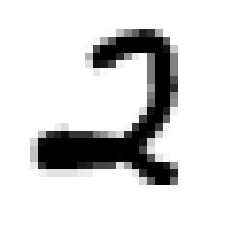

In [51]:
plt.imshow(digito, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [52]:
y[10999]

2

## 3. Pré-processamento dos dados

In [53]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [54]:
X_test.shape

(10000, 784)

In [55]:
index = np.random.permutation(60000)
X_train, y_train = X_train[index], y_train[index]

In [56]:
index = np.random.permutation(10000)
X_test, y_test = X_test[index], y_test[index]


## 4. Seleção e treinamento do modelo

#### Ponto 1: Tente alcançar uma acurácia acima de 97% no conjunto de teste com KNeighborsClassifier, ajustando os hiperparâmetros 'weights' e 'n_neighbors' com o grid search;

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
predictions = rf_clf.predict(X_test)

In [60]:
acc = sum(predictions == y_test)/len(predictions)

In [61]:
print(acc)

0.9695


In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [117]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [118]:
predictions = knn.predict(X_test)

In [119]:
acc = sum(predictions == y_test)/len(predictions)

In [120]:
print(acc)

0.9688


### Ajuste de hiperparâmetros com grid search

In [130]:
from sklearn.model_selection import GridSearchCV

In [158]:
# param_grid = [ 
#     {'n_neighbors': [1, 3, 5, 10], 'weights': ['uniform', 'distance'], 'n_jobs': [-1]}   
# ]

param_grid = { 
    'n_neighbors': [1, 3, 5, 10],
    'weights': ['uniform', 'distance']
    }   


In [159]:
knn = KNeighborsClassifier()

In [169]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

In [161]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [163]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [164]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [165]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [166]:
predictions = knn.predict(X_test)

In [167]:
acc = sum(predictions == y_test)/len(predictions)

In [168]:
print(acc)

0.9717


# #Ponto 2

#### Ponto 2: Escreva uma função que modifique apenas as imagens de treinamento do dataset deslocando um pixel em de cada imagem em qualquer direção (esquerda, direita, para cima ou para baixo), ou seja, para cada imagem no conjunto de treinamento, quatro imagens deslocadas são criadas e as adicione ao conjunto de treinamento. Em seguida, treine seu melhor classificador com o novo conjunto aumentado. Finalmente, meça o desempenho do modelo através das métricas acurácia, precisão, revocação e F1-score. Dica: a função shift() do módulo scipy.ndimage.interpolation pode ser útil para deslocar o pixel.

In [189]:
import scipy.ndimage 

In [231]:
shift_image = scipy.ndimage.shift(digito, np.array([0, 1])) #positivo baixo e esquerda negativo cima e direita

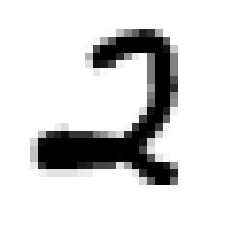

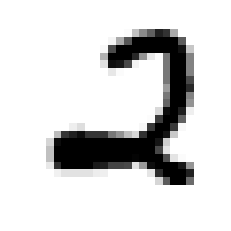

In [228]:
plt.imshow(digito, cmap = mpl.cm.binary,
            interpolation="nearest")
plt.axis("off")
plt.show()

plt.imshow(shift_image, cmap = mpl.cm.binary,
            interpolation="nearest")
plt.axis("off")
plt.show()